# Task 4: Statistical Modeling


In [15]:
import numpy as np
print(np.__version__)

2.1.1


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.statistical_modelling import *

c:\Users\eldiy\Downloads\Kifya\AlphaCare-Insurance-Solutions\.env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Data

In [2]:
data = pd.read_csv('../data/dataset.csv', low_memory=False, index_col=False)

In [3]:
models = Modelling(data)

# Specify the numeric and categorical features to use

In [4]:
numeric_features = ['SumInsured', 'CalculatedPremiumPerTerm','RegistrationYear','PostalCode'] 
categorical_features = ['Province', 'CoverType', 'VehicleType', 'make', 'Gender', 'MaritalStatus','PostalCode','Model','CoverCategory','NewVehicle','RegistrationYear','Citizenship' ]
features = list(set(numeric_features) | set(categorical_features) - set(['TotalPremium', 'TotalClaims']))

# Encode categorical variables using label encoder

In [5]:
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [6]:
X = data[features]
y_premium = data['TotalPremium']
y_claims= data['TotalClaims']

# split the data
X_train, X_test, y_claims_train, y_claims_test=models.split_data(X,y_claims)
X_train, X_test, y_premium_train, y_premium_test=models.split_data(X,y_premium)

# Model Building - Train Linear Regression Model

In [7]:
model_claim = LinearRegression()
model_premium=LinearRegression()
model_claim.fit(X_train, y_claims_train) 
model_premium.fit(X_train, y_premium_train)

LinearRegression()

In [8]:
print ('Totalclaims Linear Regression result')
models.model_testing(model_claim, X_test, y_claims_test)
print('')
print('Total Premium Linear Regression Result')
models.model_testing(model_premium, X_test,y_premium_test)

Totalclaims Linear Regression result
Mean Absolute Error (MAE): 136.3285499536411
Mean Squared Error (MSE): 4869145.917474376
Root Mean Squared Error (RMSE): 2206.6141297187364
R-squared: 0.003528408328496213

Total Premium Linear Regression Result
Mean Absolute Error (MAE): 58.80546932405988
Mean Squared Error (MSE): 16735.974980442104
Root Mean Squared Error (RMSE): 129.36759633092865
R-squared: 0.3933642886983505


# Model Training for TotalClaims

In [9]:
Linear_Regression = LinearRegression()
Linear_Regression .fit(X_train, y_claims_train) 

Decision_Tree = DecisionTreeRegressor(random_state=42)
Decision_Tree.fit(X_train, y_claims_train)

Random_Forest =RandomForestRegressor(n_estimators=100, random_state=42)
Random_Forest.fit(X_train, y_claims_train)

XGBoost= XGBRegressor(n_estimators=100, random_state=42)
XGBoost.fit(X_train, y_claims_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [10]:
model_names = {
    Linear_Regression: "Linear Regression",
    Decision_Tree: "Decision Tree",
    Random_Forest: "Random Forest",
    XGBoost: "XGBoost"
}

for model in [Linear_Regression, Decision_Tree, Random_Forest, XGBoost]:
    print(f"{model_names[model]} Model result for TotalClaims")
    
    # Perform model testing
    models.model_testing(model, X_test, y_claims_test)
    print()

Linear Regression Model result for TotalClaims
Mean Absolute Error (MAE): 136.3285499536411
Mean Squared Error (MSE): 4869145.917474376
Root Mean Squared Error (RMSE): 2206.6141297187364
R-squared: 0.003528408328496213

Decision Tree Model result for TotalClaims
Mean Absolute Error (MAE): 133.894431170003
Mean Squared Error (MSE): 5956538.021907362
Root Mean Squared Error (RMSE): 2440.6019794115064
R-squared: -0.21900658229207748

Random Forest Model result for TotalClaims
Mean Absolute Error (MAE): 133.67117935444065
Mean Squared Error (MSE): 5913179.9299619235
Root Mean Squared Error (RMSE): 2431.703092476942
R-squared: -0.21013334094236624

XGBoost Model result for TotalClaims
Mean Absolute Error (MAE): 141.33284958589425
Mean Squared Error (MSE): 5360780.519175802
Root Mean Squared Error (RMSE): 2315.3359408897454
R-squared: -0.09708470172845551



# Model Training for TotalPremium

In [11]:
Linear_Regression = LinearRegression()
Linear_Regression .fit(X_train, y_premium_train) 

Decision_Tree = DecisionTreeRegressor(random_state=42)
Decision_Tree.fit(X_train, y_premium_train)

Random_Forest =RandomForestRegressor(n_estimators=100, random_state=42)
Random_Forest.fit(X_train, y_premium_train)

XGBoost= XGBRegressor(n_estimators=100, random_state=42)
XGBoost.fit(X_train, y_premium_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [12]:
model_names = {
    Linear_Regression: "Linear Regression",
    Decision_Tree: "Decision Tree",
    Random_Forest: "Random Forest",
    XGBoost: "XGBoost"
}

for model in [Linear_Regression, Decision_Tree, Random_Forest, XGBoost]:
    print(f"{model_names[model]} Model result for Totalpremium")
    print('----------------------------------------------------')
    # Perform model testing
    models.model_testing(model, X_test, y_premium_test)
    print()

Linear Regression Model result for Totalpremium
----------------------------------------------------
Mean Absolute Error (MAE): 58.80546932405988
Mean Squared Error (MSE): 16735.974980442104
Root Mean Squared Error (RMSE): 129.36759633092865
R-squared: 0.3933642886983505

Decision Tree Model result for Totalpremium
----------------------------------------------------
Mean Absolute Error (MAE): 23.275480386978057
Mean Squared Error (MSE): 7055.149014066589
Root Mean Squared Error (RMSE): 83.99493445480263
R-squared: 0.7442691360683213

Random Forest Model result for Totalpremium
----------------------------------------------------
Mean Absolute Error (MAE): 23.46452070742833
Mean Squared Error (MSE): 6979.990254247371
Root Mean Squared Error (RMSE): 83.54633597140793
R-squared: 0.7469934462908667

XGBoost Model result for Totalpremium
----------------------------------------------------
Mean Absolute Error (MAE): 40.339705753113066
Mean Squared Error (MSE): 9913.97477185411
Root Mean Sq

# Scatter Plot for Each Model: Predicted vs. Actual Values

Plotting for Linear Regression


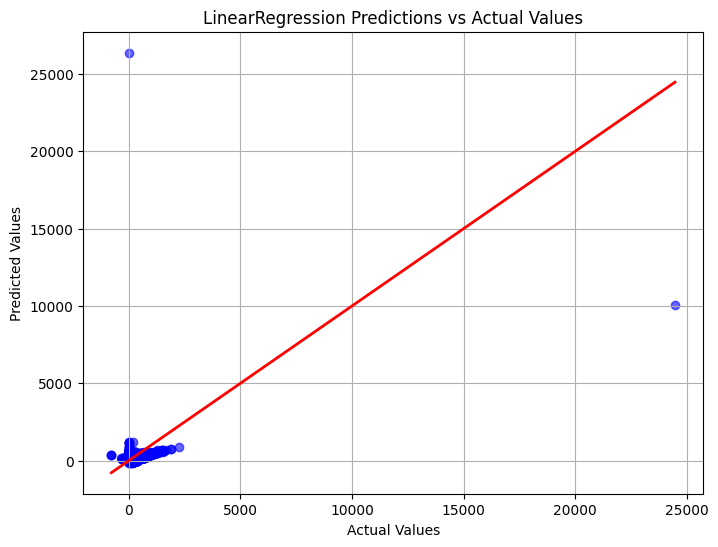


Plotting for Decision Tree


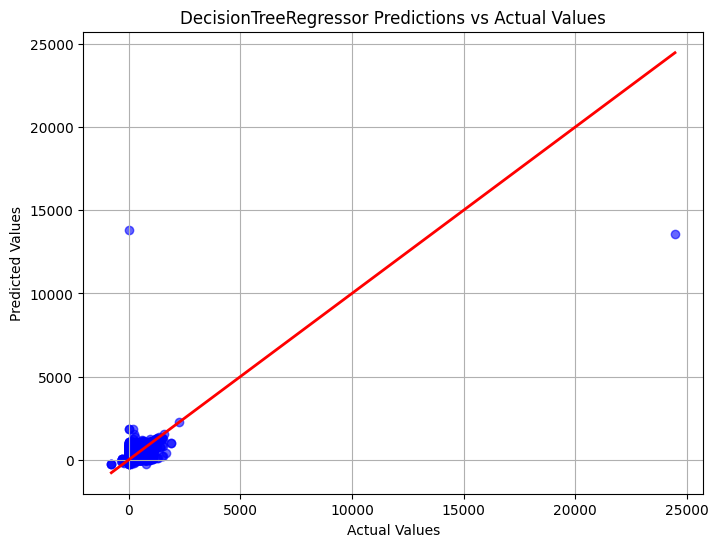


Plotting for Random Forest


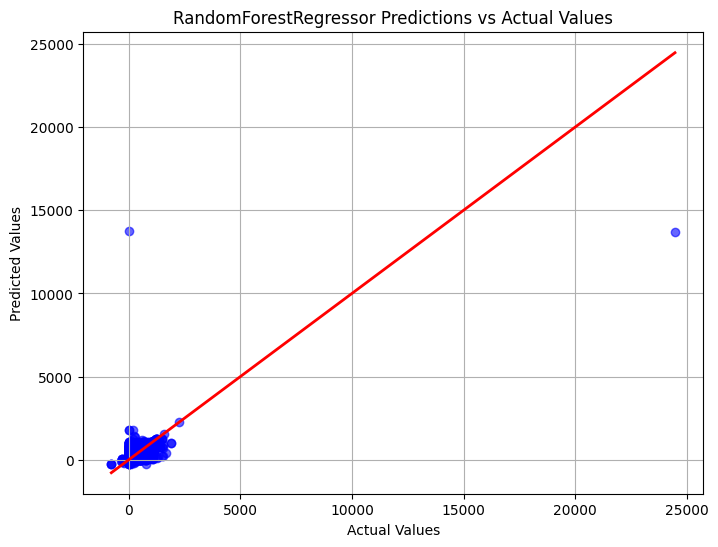


Plotting for XGBoost


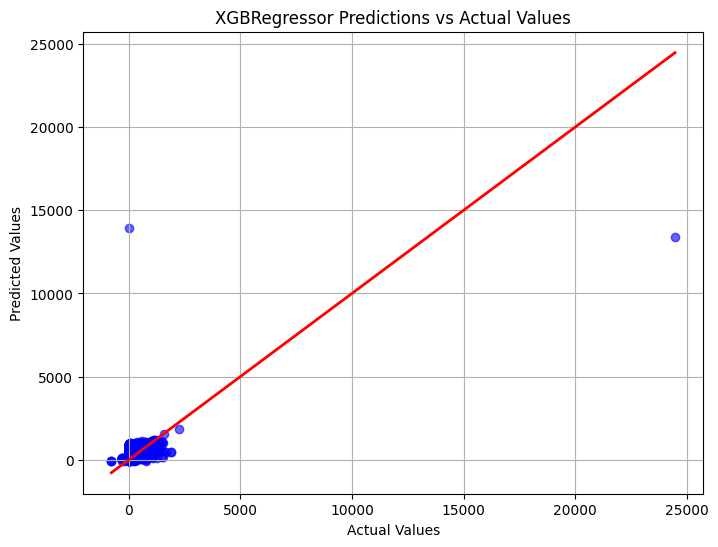

In [13]:
for model in [Linear_Regression, Decision_Tree, Random_Forest, XGBoost]:
    print(f"Plotting for {model_names[model]}")
    plot_predictions_vs_actuals(model, X_test, y_premium_test)
    print()

# Plot all models' predictions on a single scatter plot to visually compare their performance.

c:\Users\eldiy\Downloads\Kifya\AlphaCare-Insurance-Solutions\.env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


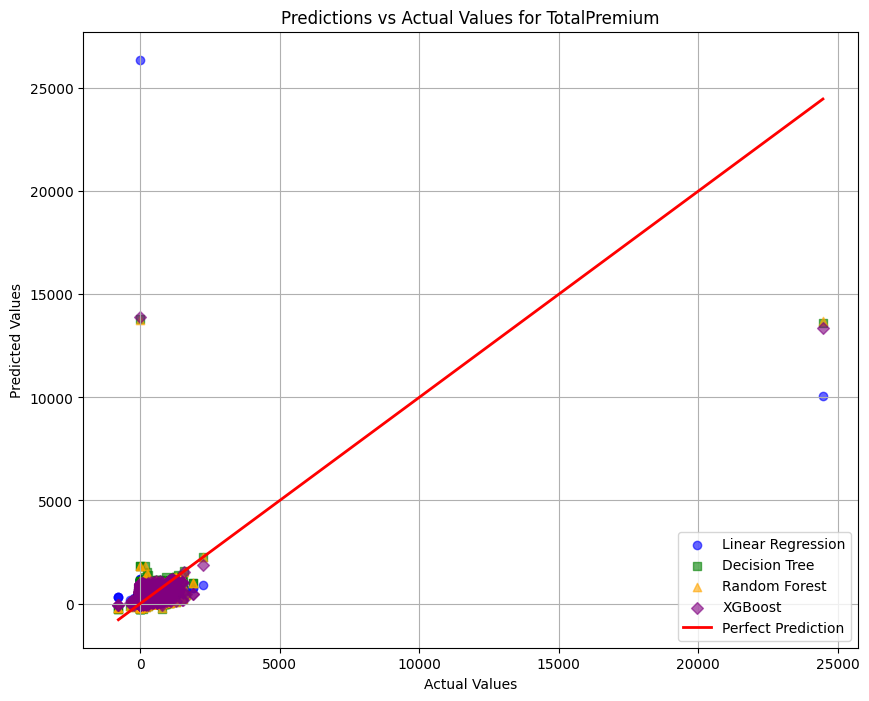

In [14]:
models_list = [
    (Linear_Regression, "Linear Regression"),
    (Decision_Tree, "Decision Tree"),
    (Random_Forest, "Random Forest"),
    (XGBoost, "XGBoost")
]

plot_all_models_predictions(models_list, X_test, y_premium_test, model_names)

In [17]:
print(X_test.shape)

(200020, 14)


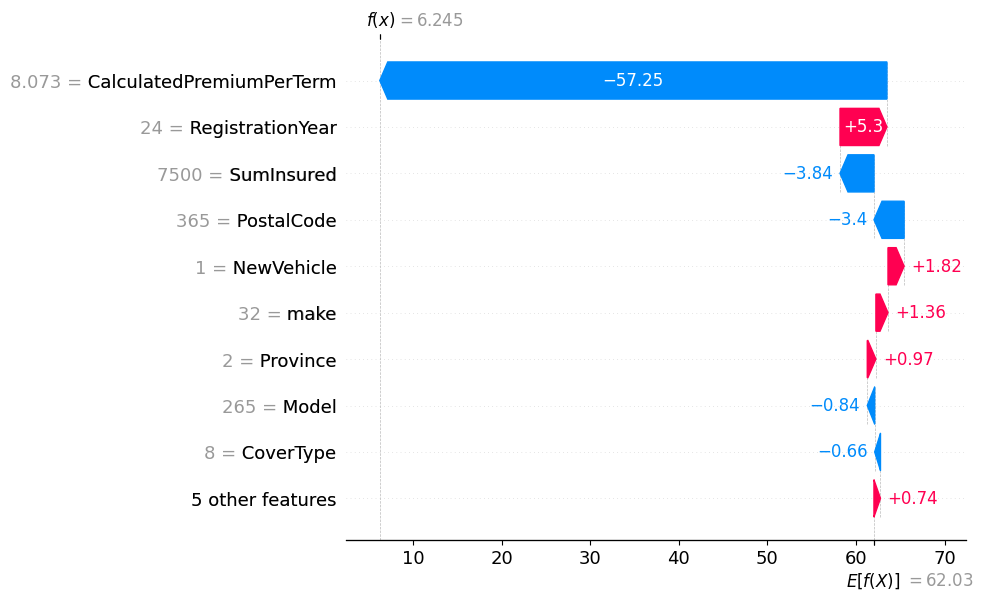

In [22]:
import shap
from xgboost import XGBRegressor

# Initialize SHAP explainer
explainer = shap.Explainer(XGBoost, feature_perturbation='interventional')
shap_values = explainer(X_test, check_additivity=False)  # Optionally disable additivity check

# Waterfall plot for the first observation
shap.waterfall_plot(shap_values[0])

In [23]:
print(shap_values)

.values =
array([[-0.22605538, -0.14413671, -0.6559421 , ...,  5.297655  ,
         1.3648807 , -0.83519447],
       [-0.21285656, -0.16112734, -0.7519312 , ...,  0.34040016,
         0.11810905,  1.3659941 ],
       [-0.22368418, -0.28661892,  0.866135  , ...,  2.1726902 ,
         0.18056577, -0.79307497],
       ...,
       [-0.14360383, -0.1971849 , -0.7453428 , ...,  1.210369  ,
         0.185753  , -0.42799535],
       [ 0.3582143 , -0.27258   ,  0.08558051, ..., -8.491947  ,
         0.7717682 , -1.8864306 ],
       [-7.2857885 , -0.46842524, -0.43443155, ..., -1.4740146 ,
         1.2209462 , -2.6126938 ]], dtype=float32)

.base_values =
array([62.0296, 62.0296, 62.0296, ..., 62.0296, 62.0296, 62.0296],
      dtype=float32)

.data =
array([[  4.,   0.,   8., ...,  24.,  32., 265.],
       [  4.,   0.,   5., ...,  19.,  42., 294.],
       [  4.,   0.,  12., ...,  24.,  42., 289.],
       ...,
       [  4.,   0.,   5., ...,  15.,  42., 221.],
       [  4.,   0.,  18., ...,  23., 

# Plot SHAP values

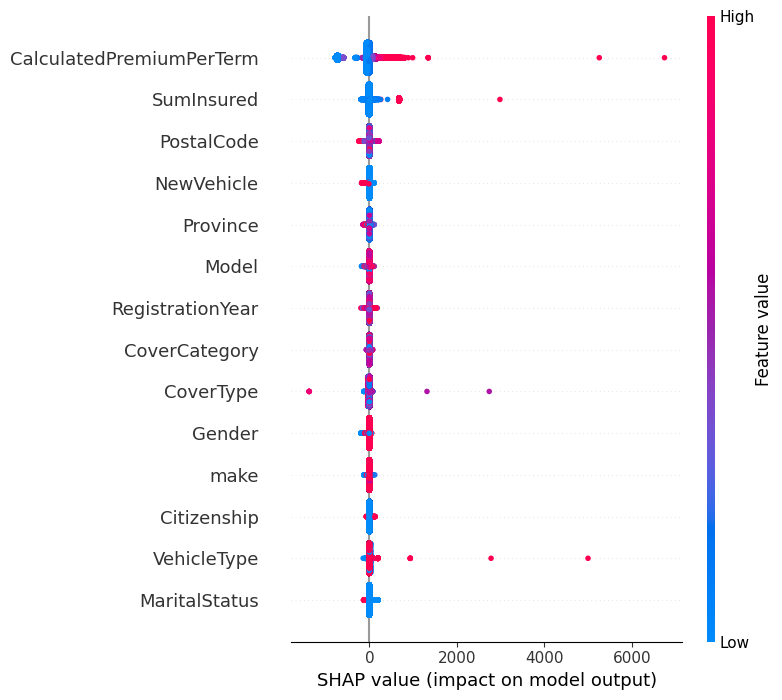

In [24]:
shap.summary_plot(shap_values, X_test)

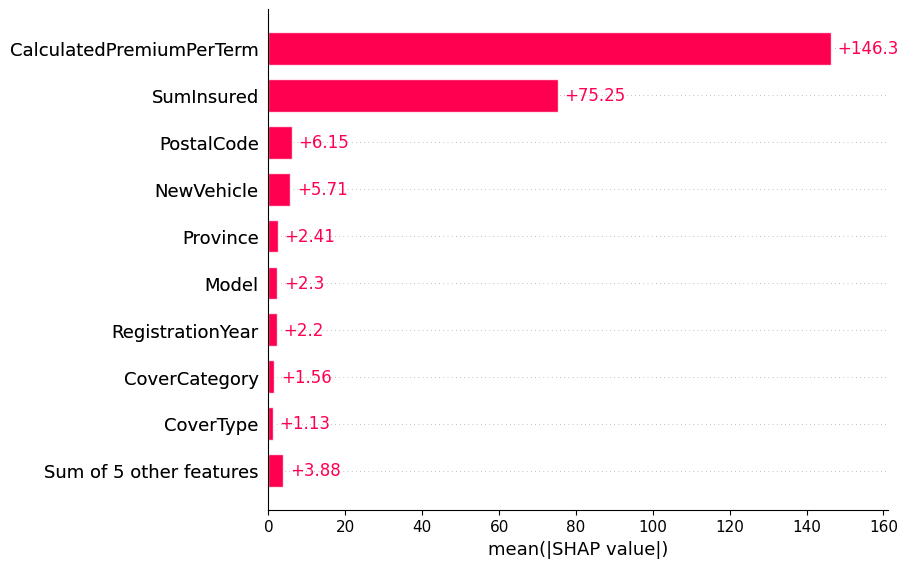

In [25]:
shap.plots.bar(shap_values)